## Plotting UV Data

We are going to use a library called `pyrap`, and a language called `TaQL` to look at visibility data. 

Let's start by importing the necessary libraries.

In [7]:
%matplotlib inline
import pylab as pl
import matplotlib
import pyrap.tables as pt

Define a variable that points to the simulated measurement set.

In [55]:
vis = '/home/fox/notebooks/sim/sim.brads-random-array.ms/'

Now, we are going ot open the MS and collect the _cross-correlations_, i.e., the interferometric data.

In [56]:
t = pt.table(vis)
#tb.open(vis)
# Get the cross-correlations
t1 = t.query('ANTENNA1!=ANTENNA2')

# Close the old table, now that we're done with it. 
t.close()

Successful readonly open of default-locked table /home/fox/notebooks/sim/sim.brads-random-array.ms/: 24 columns, 136800 rows


I want the **UVW** and the associated measurements. These are located in the **UVW** and **DATA** columns of the table. In the next cell, I illustrate how to get the data, and how to have a look at the data structure. **UVW** data ought to be a matrix, with each column corresponding to u, v and w coordinates. **DATA** ought to be a matrix, with each column corresponding to X and Y polarization data.

In [57]:
uvw = t1.getcol('UVW')
print "shape uvw", pl.shape(uvw)
data = t1.getcol('DATA')
print "shape of data", pl.shape(data)
t1.close()

shape uvw (136800, 3)
shape of data (136800, 1, 2)


In this case, the stokes X and Y data are identical, since we did a stokes I simulation. 

In the next cell, I calculate the amplitude of the complex vector by using the `absolute` function in `pylab`. I also calculate the uv-distance.

In [58]:
amp = pl.absolute(data[:,0,0])
# Confirm that the second column is identical.
amp1 = pl.absolute(data[:,0,1])
uvdist = pl.sqrt(uvw[:,0]**2 + uvw[:,1]**2)

Now, let's plot this!

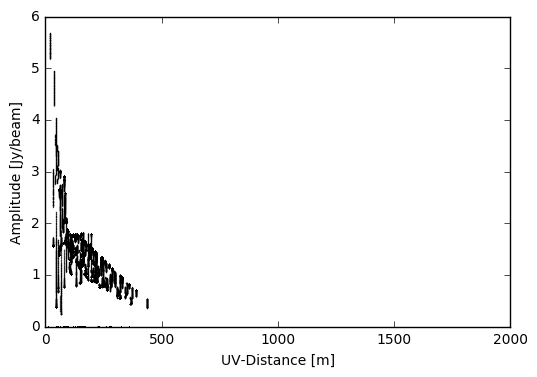

In [59]:
pl.plot(uvdist, amp, 'k.', ms=1, alpha=0.1)
pl.xlim(0,2000)
pl.xlabel('UV-Distance [m]')
pl.ylabel('Amplitude [Jy/beam]')

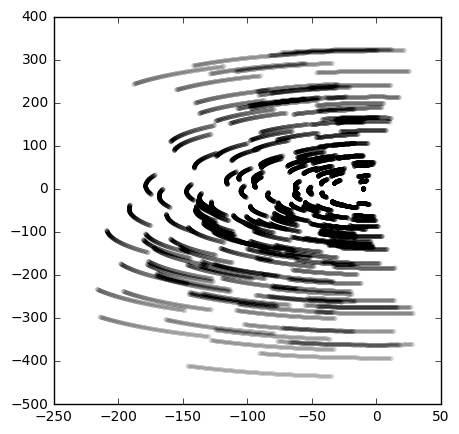

In [61]:
pl.figure(figsize=(5,5))
pl.plot(uvw[:,0], uvw[:,1], 'k.', alpha=0.01)
#pl.xlim(-8000,8000)
#pl.ylim(-8000,8000)

### Advanced
You can plot the UVW data as a scatterplot. This will take a long time to plot. In general, *W* is a measure of the telescopes co-planarity. A small deviation indicates an antenna that is largely co-planar. Observations with a co-planar array are easier to image and to interpret.

(-8000, 8000)

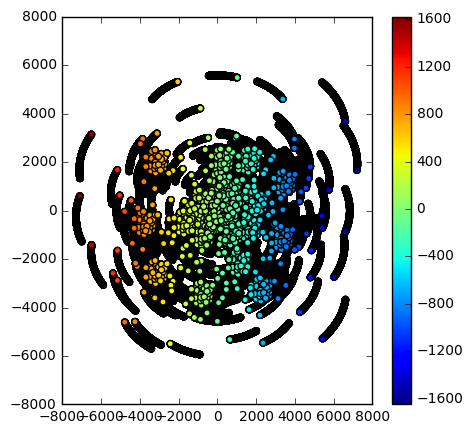

In [48]:
pl.figure(figsize=(5,5))
pl.scatter(uvw[:,0], uvw[:,1], c=uvw[:,2], edgecolors=None)
pl.colorbar()
pl.xlim(-8000,8000)
pl.ylim(-8000,8000)